In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

## Visualizing the dataset

In [94]:
import pandas as pd
data = pd.read_csv('Data.csv')
print(type(data))
data.head()



<class 'pandas.core.frame.DataFrame'>


,id,distractor,tv,reading,music,talking_phone,messaging,socnet,comp_video,other_comp,...,first_language,faculty,academic_performance,parents_qualification,navigation_tool,life1,life2,life3,recall_1,recall_2
0,1,absa,2-3 hours,30 minute to 1 hour,1-2 hours,Not at all,1-2 hours,1-2 hours,Less than 30 minutes,1-2 hours,...,English,Arts and Social Sciences,75-80%,University - Masters or PhD,Mouse,6,26,24,Absa,Shared growth
1,3,absa,1-2 hours,30 minute to 1 hour,Less than 30 minutes,Less than 30 minutes,30 minute to 1 hour,1-2 hours,1-2 hours,1-2 hours,...,Other European language,Arts and Social Sciences,55-60%,University - Masters or PhD,Touch pad,21,37,4,Absa,Personal growth
2,4,absa,Less than 30 minutes,Less than 30 minutes,1-2 hours,Less than 30 minutes,1-2 hours,30 minute to 1 hour,1-2 hours,30 minute to 1 hour,...,Other European language,Arts and Social Sciences,60-65%,Matric,Touch pad,6,38,28,Absa,Capital growth
3,5,absa,30 minute to 1 hour,1-2 hours,30 minute to 1 hour,Less than 30 minutes,2-3 hours,2-3 hours,1-2 hours,1-2 hours,...,English,Arts and Social Sciences,70-75%,Matric,Mouse,23,26,14,Absa,Personal growth
4,6,absa,Not at all,2-3 hours,30 minute to 1 hour,Less than 30 minutes,3 hours or more,Not at all,2-3 hours,3 hours or more,...,Afrikaans,Science,70-75%,University - Bachelors,Mouse,34,31,47,Absa,Personal growth


transforming year of birth into the age

In [95]:
columns_to_keep = ['music', 'talking_phone', 'socnet', 'messaging', 'comp_video', 'games', 'yob', 'gender', 'academic_performance']

df = data[columns_to_keep]


df['yob'] -= 2018
df['yob'] *= -1

#abs(df['yob'])
#df.loc['yob'] -= 2008

df.head()
df = df.rename(columns = {'yob' : 'age'})



/tmp/ipykernel_4909/1107924105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yob'] -= 2018
/tmp/ipykernel_4909/1107924105.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yob'] *= -1


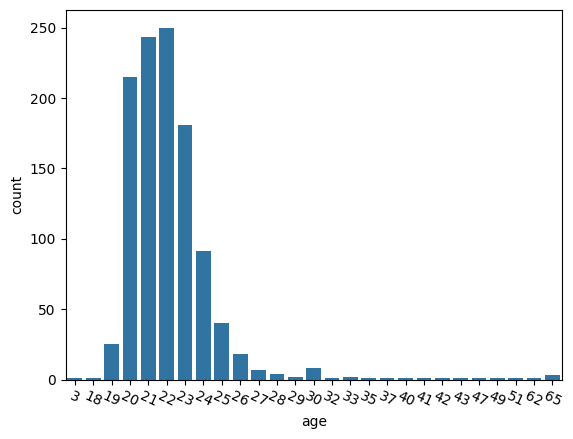

In [96]:

sns.countplot(x='age', data=df)
plt.xticks(rotation=-25)
plt.show()


Removing person aged 3

In [97]:
df.loc[df['age'] == 3]

,music,talking_phone,socnet,messaging,comp_video,games,age,gender,academic_performance
971,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,3,Other,35-40%


Index([971], dtype='int64')


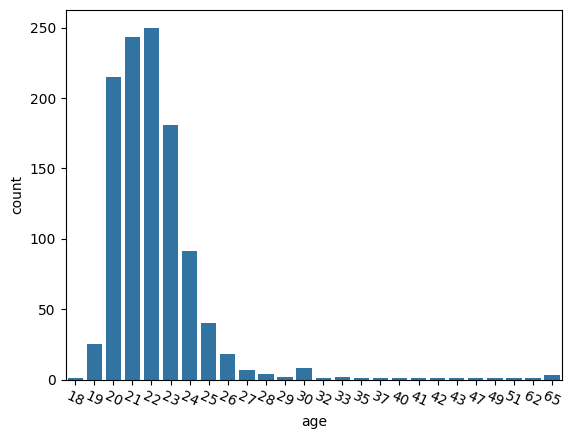

In [98]:
i = df.loc[df['age'] == 3].index
print(i)

df = df.drop(i)

sns.countplot(x='age', data=df)
plt.xticks(rotation=-25)
plt.show()

Calculating the mean age and the standard deviation

In [99]:
mean_age = df['age'].mean()
std_age = df['age'].std()

print("Mean age:", mean_age)
print("Standard deviation of age:", std_age)


Mean age: 22.297910990009083
Standard deviation of age: 3.689331695489407


Checking how the amount of time spent listening to music is distributed over the 5 values it can take

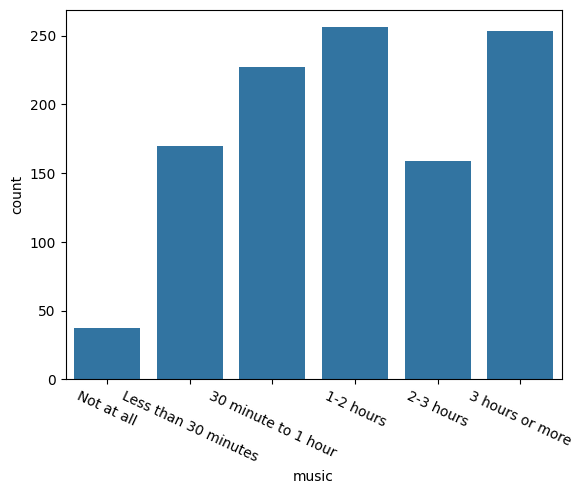

In [100]:
sns.countplot(x='music', data=data, order=['Not at all', 'Less than 30 minutes', '30 minute to 1 hour', '1-2 hours', '2-3 hours', '3 hours or more'])
plt.xticks(rotation=-25)
plt.show()

Grouping everyone aged 27 and above into one group

In [101]:
df['age'] = df['age'].apply(lambda x: x if 19 <= x <= 26 else '27+')



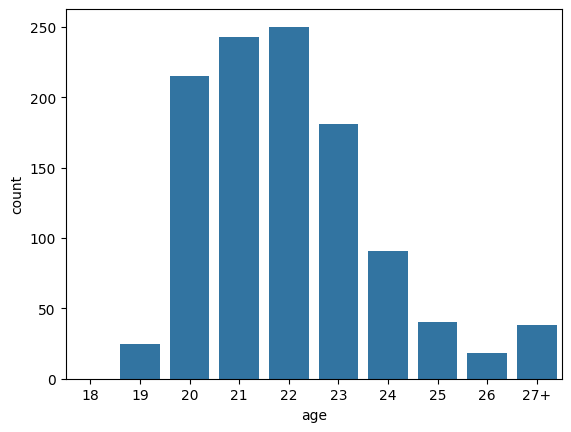

In [102]:
age_order = list(range(18, 27)) + ['27+']

sns.countplot(x='age', data=df, order=age_order)
plt.xticks(rotation=0)
plt.show()

In [103]:
df['age'] = df['age'].apply(lambda x: 27 if x == '27+' else x)

X = df.drop(columns=['academic_performance'])
y = df['academic_performance']




X.head()

,music,talking_phone,socnet,messaging,comp_video,games,age,gender
0,1-2 hours,Not at all,1-2 hours,1-2 hours,Less than 30 minutes,2-3 hours,22,Female
1,Less than 30 minutes,Less than 30 minutes,1-2 hours,30 minute to 1 hour,1-2 hours,Not at all,27,Male
2,1-2 hours,Less than 30 minutes,30 minute to 1 hour,1-2 hours,1-2 hours,Less than 30 minutes,23,Male
3,30 minute to 1 hour,Less than 30 minutes,2-3 hours,2-3 hours,1-2 hours,Not at all,23,Female
4,30 minute to 1 hour,Less than 30 minutes,Not at all,3 hours or more,2-3 hours,Not at all,24,Male


In [104]:
print(y.value_counts())


academic_performance
60-65%           250
55-60%           206
65-70%           199
50-55%           136
70-75%           134
75-80%            90
80-85%            44
45-50%            19
More than 85%     13
40-45%             8
35-40%             2
Name: count, dtype: int64


## Encoding the data

Ordinal encoding the digital activities

In [105]:
to_be_encoded = X.drop(columns = ['age', 'gender'])
personal_info = X[['age', 'gender']]

In [106]:
categories_X=[['Not at all', 'Less than 30 minutes', '30 minute to 1 hour', 
            '1-2 hours','2-3 hours', '3 hours or more']]
print(type(to_be_encoded))

print(to_be_encoded.shape)

encoder = OrdinalEncoder(categories=categories_X * to_be_encoded.shape[1])

result = encoder.fit_transform(to_be_encoded)
print(result)

print(type(result))

<class 'pandas.core.frame.DataFrame'>
(1101, 6)
[[3. 0. 3. 3. 1. 4.]
 [1. 1. 3. 2. 3. 0.]
 [3. 1. 2. 3. 3. 1.]
 ...
 [3. 1. 3. 4. 4. 0.]
 [0. 1. 1. 2. 1. 0.]
 [4. 1. 0. 3. 1. 0.]]
<class 'numpy.ndarray'>


Dummy encoding the gender

In [107]:

result2 = pd.get_dummies(personal_info, columns=['gender'], dtype = int)
print(result2.head(10))

print(type(result2))

   age  gender_Female  gender_Male  gender_Other
0   22              1            0             0
1   27              0            1             0
2   23              0            1             0
3   23              1            0             0
4   24              0            1             0
5   27              1            0             0
6   25              1            0             0
7   20              1            0             0
8   21              0            1             0
9   26              1            0             0
<class 'pandas.core.frame.DataFrame'>


Transforming the encoded arrays into a new data frame, and renaming the columns appropriately

In [108]:
new_df = pd.DataFrame(result)
new_df = new_df.rename(columns = {0 : 'music', 1:'talking_phone', 2 : 'social_media', 
                                  3: 'texting', 4: 'watching_video', 5: 'gaming'})
print(new_df.head())


   music  talking_phone  social_media  texting  watching_video  gaming
0    3.0            0.0           3.0      3.0             1.0     4.0
1    1.0            1.0           3.0      2.0             3.0     0.0
2    3.0            1.0           2.0      3.0             3.0     1.0
3    2.0            1.0           4.0      4.0             3.0     0.0
4    2.0            1.0           0.0      5.0             4.0     0.0


In [109]:
features = ['music', 'talking_phone', 'social_media', 'texting', 'watching_video',
            'gaming', 'age', 'being_male', 'being_female', 'being_anothe_gender']

X_age = pd.DataFrame.join(new_df, result2)
X_age.head()

#X = X_age
#y = y_clean

,music,talking_phone,social_media,texting,watching_video,gaming,age,gender_Female,gender_Male,gender_Other
0,3.0,0.0,3.0,3.0,1.0,4.0,22.0,1.0,0.0,0.0
1,1.0,1.0,3.0,2.0,3.0,0.0,27.0,0.0,1.0,0.0
2,3.0,1.0,2.0,3.0,3.0,1.0,23.0,0.0,1.0,0.0
3,2.0,1.0,4.0,4.0,3.0,0.0,23.0,1.0,0.0,0.0
4,2.0,1.0,0.0,5.0,4.0,0.0,24.0,0.0,1.0,0.0


There is a row missing age and gender. Removing it

In [110]:

print(X.isna().sum())
X_clean = X_age.dropna()
y_clean = y[X_clean.index]


X = X_clean
y = y_clean


music            0
talking_phone    0
socnet           0
messaging        0
comp_video       0
games            0
age              0
gender           0
dtype: int64


Ecoding the target variable

In [111]:
categories=[['35-40%', '40-45%', '45-50%', '50-55%','55-60%', 
            '60-65%', '65-70%', '70-75%', '75-80%', '80-85%', 'More than 85%']]

#print(type(y))
y_reshaped = y.to_numpy().reshape(-1, 1)


encoder = OrdinalEncoder(categories=categories)

#print(y.shape)
result = encoder.fit_transform(y_reshaped)
print(result)


[[8.]
 [4.]
 [5.]
 ...
 [7.]
 [3.]
 [4.]]


In [112]:
y = pd.Series(result.ravel(), name='Academic_performance')
print(y)

0        8.0
1        4.0
2        5.0
3        7.0
4        7.0
        ... 
1095    10.0
1096     8.0
1097     7.0
1098     3.0
1099     4.0
Name: Academic_performance, Length: 1100, dtype: float64


## Dealing with class imbalance

Transforming 10 possible classes into 3

In [113]:
def bin_performance(x):
    if x <= 3:
        return 0
    elif x <= 6:
        return 1
    else:
        return 2

y_binned = y.apply(bin_performance)


In [114]:
print(y_binned)


0       2
1       1
2       1
3       2
4       2
       ..
1095    2
1096    2
1097    2
1098    0
1099    1
Name: Academic_performance, Length: 1100, dtype: int64


Resample the data

In [115]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y_binned)

X = X_resampled
y = y_resampled

print(type(y))
print(y.head())

<class 'pandas.core.series.Series'>
0    2
1    1
2    1
3    2
4    2
Name: Academic_performance, dtype: int64


## Dummy classifier - randomly predicts a class

In [116]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)


dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
dummy_clf.fit(X_train, y_train)  

y_pred = dummy_clf.predict(X_test)

print("Accuracy:", dummy_clf.score(X_test, y_test))

Accuracy: 0.32061068702290074


In [117]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Confusion Matrix:
[[42 43 48]
 [45 46 50]
 [46 35 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.32      0.32       133
           1       0.37      0.33      0.35       141
           2       0.28      0.32      0.30       119

    accuracy                           0.32       393
   macro avg       0.32      0.32      0.32       393
weighted avg       0.32      0.32      0.32       393



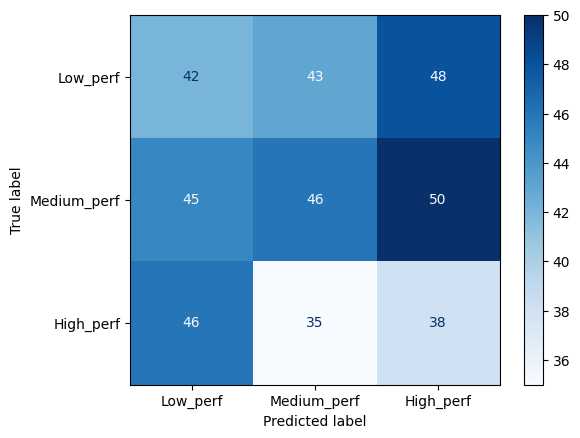

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Low_perf',  'Medium_perf', 'High_perf'])
disp.plot(cmap='Blues')
plt.show()

## Random forest

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)


param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(5, 100)
}

search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, 
                            n_iter=10, cv=5, random_state=42)


search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(search.score(X_test, y_test)))

print("Best parameters: {}".format(search.best_params_))
print("Best cross-validation score: {:.2f}".format(search.best_score_))


Test set score: 0.83
Best parameters: {'max_depth': 26, 'n_estimators': 408}
Best cross-validation score: 0.79


In [120]:
best_par = search.best_params_
print(best_par)

{'max_depth': 26, 'n_estimators': 408}


Assesing performance

In [121]:
y_pred = search.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       133
           1       0.86      0.68      0.76       141
           2       0.76      0.86      0.81       119

    accuracy                           0.83       393
   macro avg       0.83      0.84      0.83       393
weighted avg       0.84      0.83      0.83       393



In [122]:
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score

y_pred = search.predict(X_test)

print("Precision:", precision_score(y_test, y_pred, average='weighted'))  
print("Recall:", recall_score(y_test, y_pred, average='weighted'))  
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))  
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))

Precision: 0.8357600793228
Recall: 0.8320610687022901
F1-Score: 0.8282316020409429
Balanced Accuracy: 0.8359729110009065


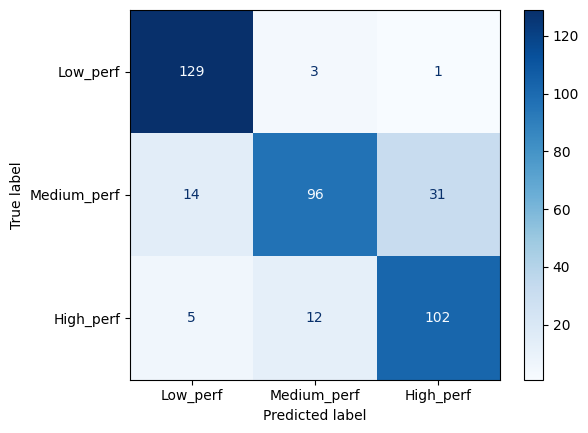

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Low_perf',  'Medium_perf', 'High_perf'])
disp.plot(cmap='Blues')
plt.show()

In [124]:
#This takes a lot of time to run. Do it only when necessary


'''
from sklearn.model_selection import cross_val_score
scores = cross_val_score(search, X, y, cv=5, scoring='f1_weighted')
print("CV F1-Score:", scores.mean())
'''

'\nfrom sklearn.model_selection import cross_val_score\nscores = cross_val_score(search, X, y, cv=5, scoring=\'f1_weighted\')\nprint("CV F1-Score:", scores.mean())\n'

## Feature imporance

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y.value_counts())

est = best_par['n_estimators']
depth = best_par['max_depth']

rf_classifier = RandomForestClassifier(n_estimators=est, class_weight='balanced', max_depth= depth, random_state=42)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


Academic_performance
2    654
1    654
0    654
Name: count, dtype: int64


In [126]:

import numpy as np

importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_], axis=0)


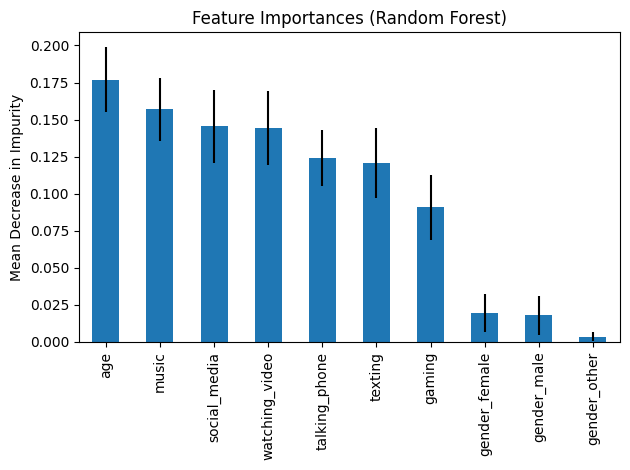

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

features = ['music', 'talking_phone', 'social_media', 'texting', 'watching_video', 'gaming', 'age', 'gender_male', 'gender_female', 'gender_other']

forest_importances = pd.Series(importances, index=features)
forest_std = pd.Series(std, index=features)

sorted_importances = forest_importances.sort_values(ascending=False)
sorted_std = forest_std[sorted_importances.index]

fig, ax = plt.subplots()
sorted_importances.plot.bar(yerr=sorted_std, ax=ax)
ax.set_title("Feature Importances (Random Forest)")
ax.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()
plt.show()


In [128]:
import pandas as pd

features = ['music', 'talking_phone', 'social_media', 'texting', 'watching_video', 'gaming', 'age', 'gender_male', 'gender_female', 'gender_other']

forest_importances = pd.Series(importances, index=features)
forest_std = pd.Series(std, index=features)

sorted_importances = forest_importances.sort_values(ascending=False)
sorted_std = forest_std[sorted_importances.index]

print("Feature importances (descending):\n")
for feature in sorted_importances.index:
    mean = sorted_importances[feature]
    error = sorted_std[feature]
    print(f"{feature}: {mean:.4f} ± {error:.4f}")


Feature importances (descending):

age: 0.1770 ± 0.0219
music: 0.1569 ± 0.0213
social_media: 0.1454 ± 0.0245
watching_video: 0.1442 ± 0.0252
talking_phone: 0.1240 ± 0.0188
texting: 0.1207 ± 0.0236
gaming: 0.0907 ± 0.0216
gender_female: 0.0195 ± 0.0127
gender_male: 0.0181 ± 0.0132
gender_other: 0.0035 ± 0.0029


In [129]:
normalized = sorted_importances / sorted_importances.sum()
for feature in normalized.index:
    print(f"{feature}: {normalized[feature]:.4f}")


age: 0.1770
music: 0.1569
social_media: 0.1454
watching_video: 0.1442
talking_phone: 0.1240
texting: 0.1207
gaming: 0.0907
gender_female: 0.0195
gender_male: 0.0181
gender_other: 0.0035


Partial Dependence Plots (PDPs).


PDPs show the effect of a feature on the predicted outcome, keeping other variables averaged out.

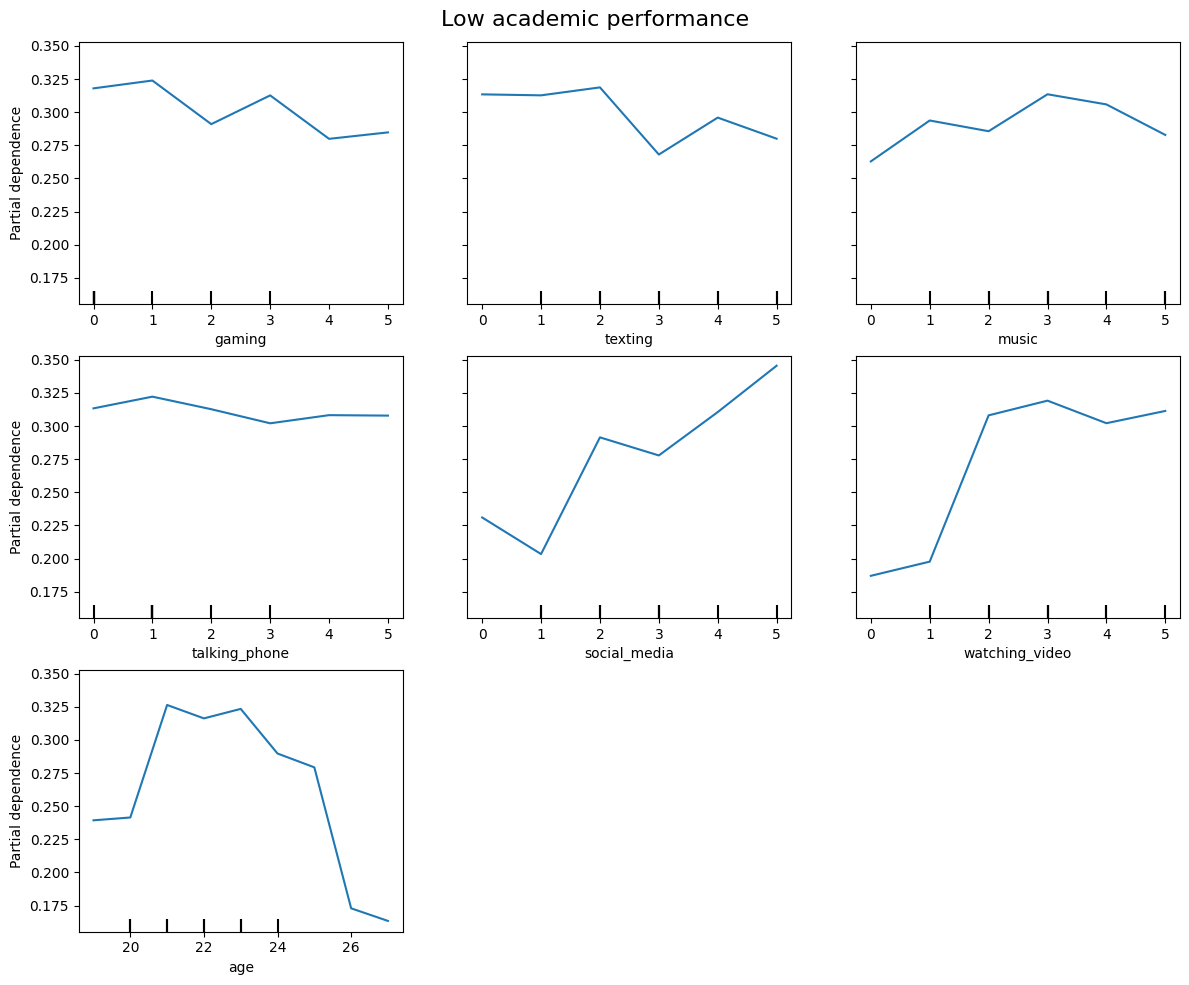

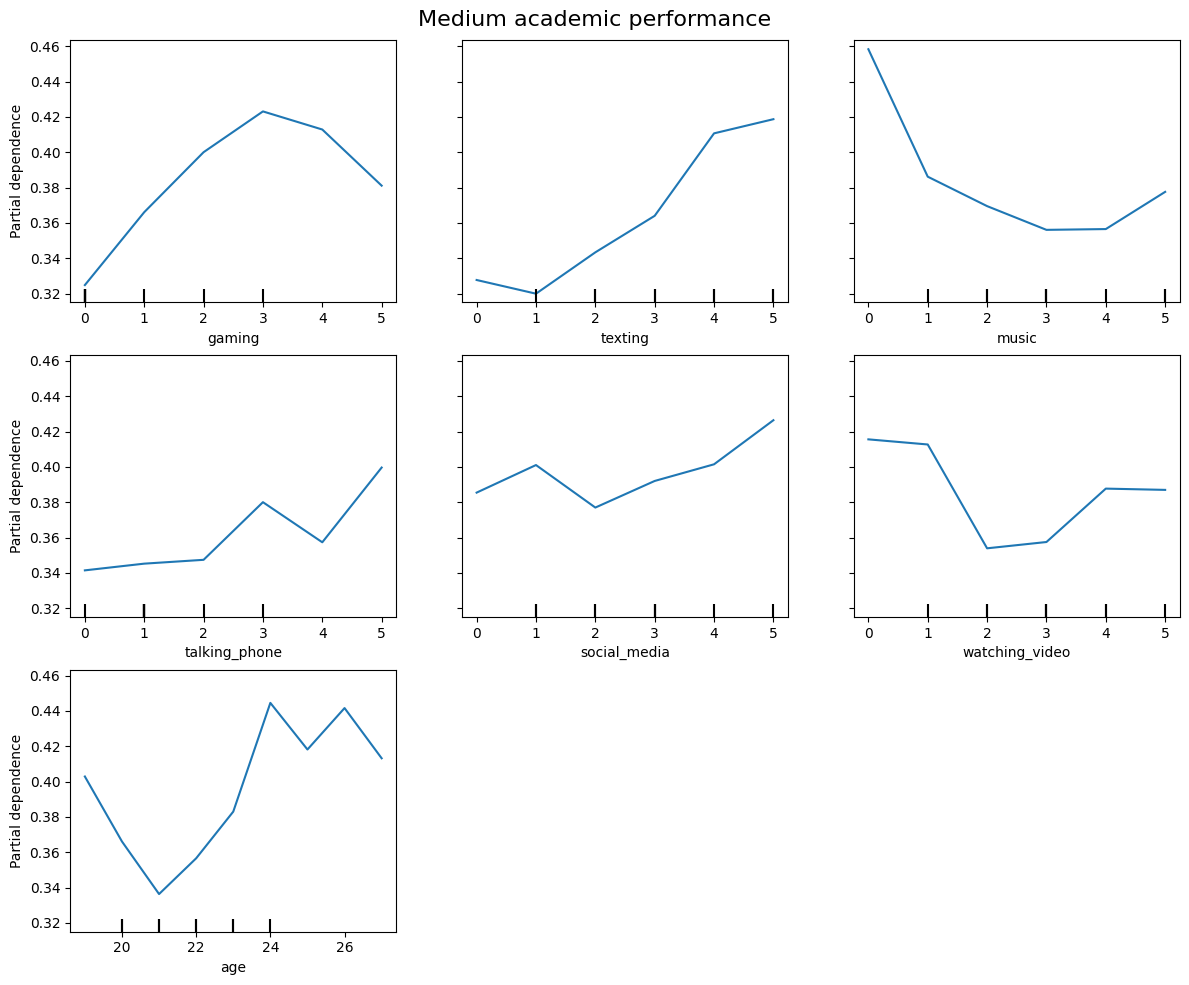

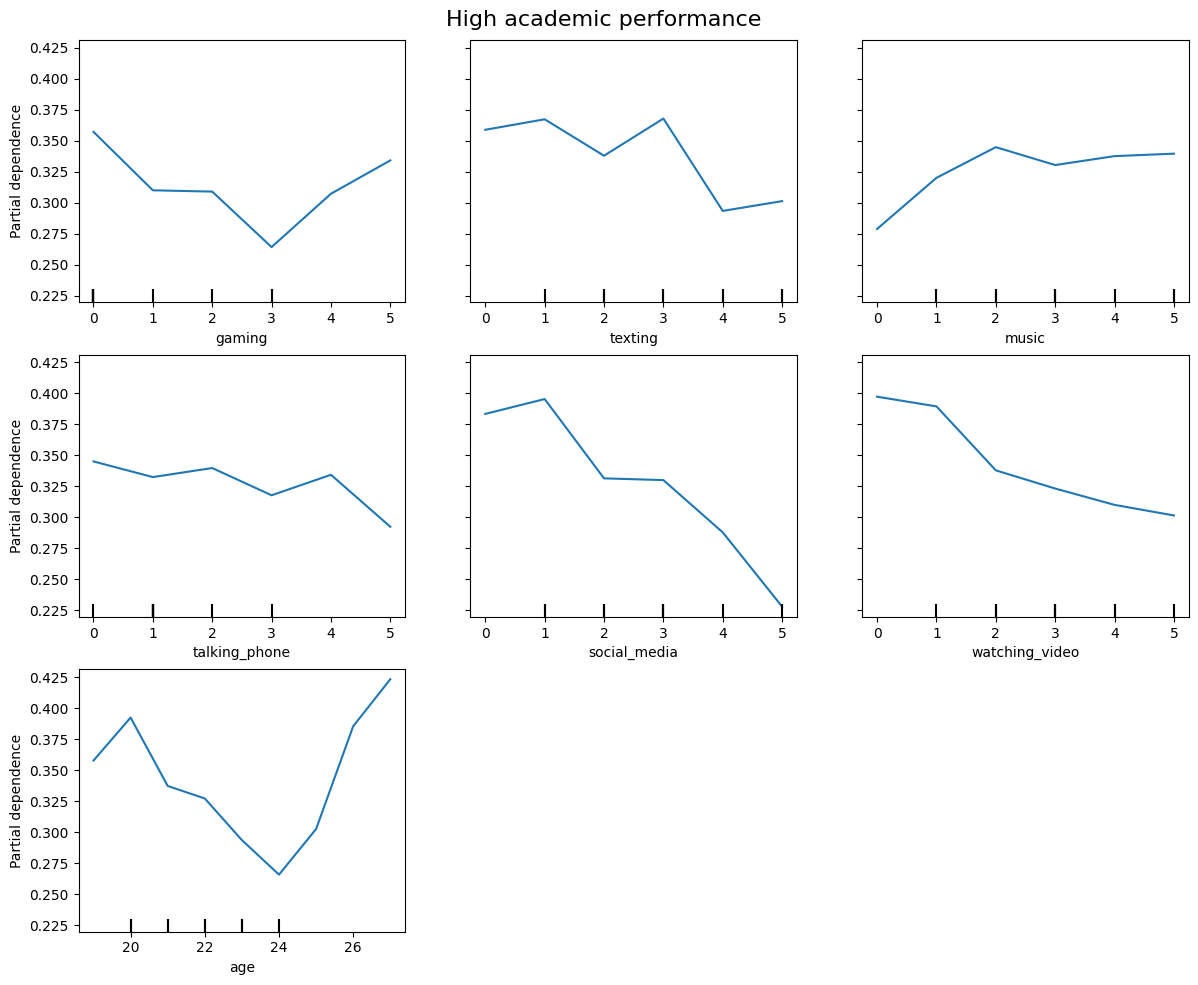

In [130]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

variables=['gaming', 'texting', 'music', 'talking_phone', 'social_media', 'watching_video', 'age']


fig, ax = plt.subplots(figsize=(12, 10)) 
PartialDependenceDisplay.from_estimator(search, X, features=variables, target=0, ax=ax)

fig.suptitle("Low academic performance", fontsize=16)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(12, 10)) 
PartialDependenceDisplay.from_estimator(search, X, features=variables, target=1, ax=ax)

fig.suptitle("Medium academic performance", fontsize=16)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(12, 10))
PartialDependenceDisplay.from_estimator(search, X, features=variables, target=2, ax=ax)

fig.suptitle("High academic performance", fontsize=16)
plt.tight_layout()
plt.show()

## Gradient boost

In [131]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)


param_dist = {
    'learning_rate': uniform(0.01, 0.3),            
    'max_iter': randint(100, 1000),                  
    'max_leaf_nodes': randint(15, 255),             
    'min_samples_leaf': randint(5, 100),             
    'l2_regularization': uniform(0.0, 10.0),         
    'max_bins': randint(64, 255)                    
}

search = RandomizedSearchCV(
    HistGradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',   
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)


print("Test set score: {:.2f}".format(search.score(X_test, y_test)))

print("Best parameters: {}".format(search.best_params_))
print("Best cross-validation score: {:.2f}".format(search.best_score_))

Test set score: 0.80
Best parameters: {'l2_regularization': np.float64(2.587799816000169), 'learning_rate': np.float64(0.2087566853061946), 'max_bins': 65, 'max_iter': 489, 'max_leaf_nodes': 68, 'min_samples_leaf': 8}
Best cross-validation score: 0.79


In [132]:
y_pred = search.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       133
           1       0.78      0.62      0.69       130
           2       0.73      0.85      0.79       130

    accuracy                           0.80       393
   macro avg       0.80      0.80      0.79       393
weighted avg       0.80      0.80      0.79       393



In [133]:

print("Precision:", precision_score(y_test, y_pred, average='weighted'))  
print("Recall:", recall_score(y_test, y_pred, average='weighted'))  
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))  
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))

Precision: 0.799679340497068
Recall: 0.7989821882951654
F1-Score: 0.7949863151367417
Balanced Accuracy: 0.798014266435319


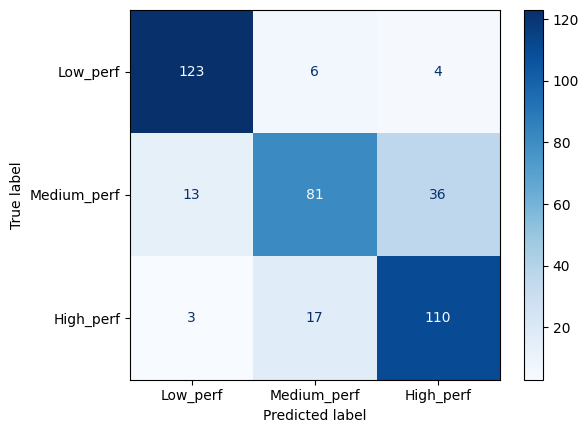

In [134]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Low_perf',  'Medium_perf', 'High_perf'])
disp.plot(cmap='Blues')
plt.show()

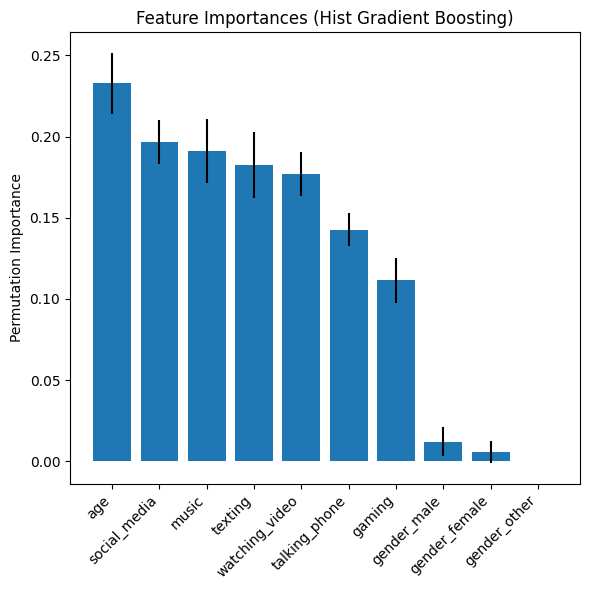

In [135]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

result = permutation_importance(
    search.best_estimator_, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

sorted_idx = result.importances_mean.argsort()[::-1]
top_n = 10
feature_names = features

plt.figure(figsize=(6, 6))
plt.bar(
    range(top_n), 
    result.importances_mean[sorted_idx][:top_n], 
    yerr=result.importances_std[sorted_idx][:top_n]
)

plt.xticks(range(top_n), np.array(feature_names)[sorted_idx][:top_n], rotation=45, ha='right')
plt.ylabel("Permutation Importance")
plt.title("Feature Importances (Hist Gradient Boosting)")
plt.tight_layout()
plt.show()

In [136]:
from sklearn.inspection import permutation_importance

result = permutation_importance(search.best_estimator_, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

import numpy as np

sorted_idx = result.importances_mean.argsort()[::-1]
feature_names_array = np.array(feature_names)

print("Feature importances (by permutation):\n")
for i in sorted_idx:
    print(f"{feature_names_array[i]}: {result.importances_mean[i]:.4f} ± {result.importances_std[i]:.4f}")


Feature importances (by permutation):

age: 0.2328 ± 0.0187
social_media: 0.1967 ± 0.0136
music: 0.1911 ± 0.0198
texting: 0.1827 ± 0.0202
watching_video: 0.1768 ± 0.0135
talking_phone: 0.1427 ± 0.0103
gaming: 0.1115 ± 0.0139
gender_male: 0.0122 ± 0.0089
gender_female: 0.0059 ± 0.0069
gender_other: 0.0000 ± 0.0000


In [137]:
importances_mean = result.importances_mean[sorted_idx]
importances_sum = importances_mean.sum()
normalized_importances = importances_mean / importances_sum

# Print normalized importances
print("Normalized Feature importances (by permutation):\n")
for i in range(len(sorted_idx)):
    print(f"{feature_names_array[sorted_idx[i]]}: {normalized_importances[i]:.4f} ± {result.importances_std[sorted_idx[i]]:.4f}")

Normalized Feature importances (by permutation):

age: 0.1859 ± 0.0187
social_media: 0.1570 ± 0.0136
music: 0.1526 ± 0.0198
texting: 0.1459 ± 0.0202
watching_video: 0.1412 ± 0.0135
talking_phone: 0.1140 ± 0.0103
gaming: 0.0890 ± 0.0139
gender_male: 0.0098 ± 0.0089
gender_female: 0.0047 ± 0.0069
gender_other: 0.0000 ± 0.0000


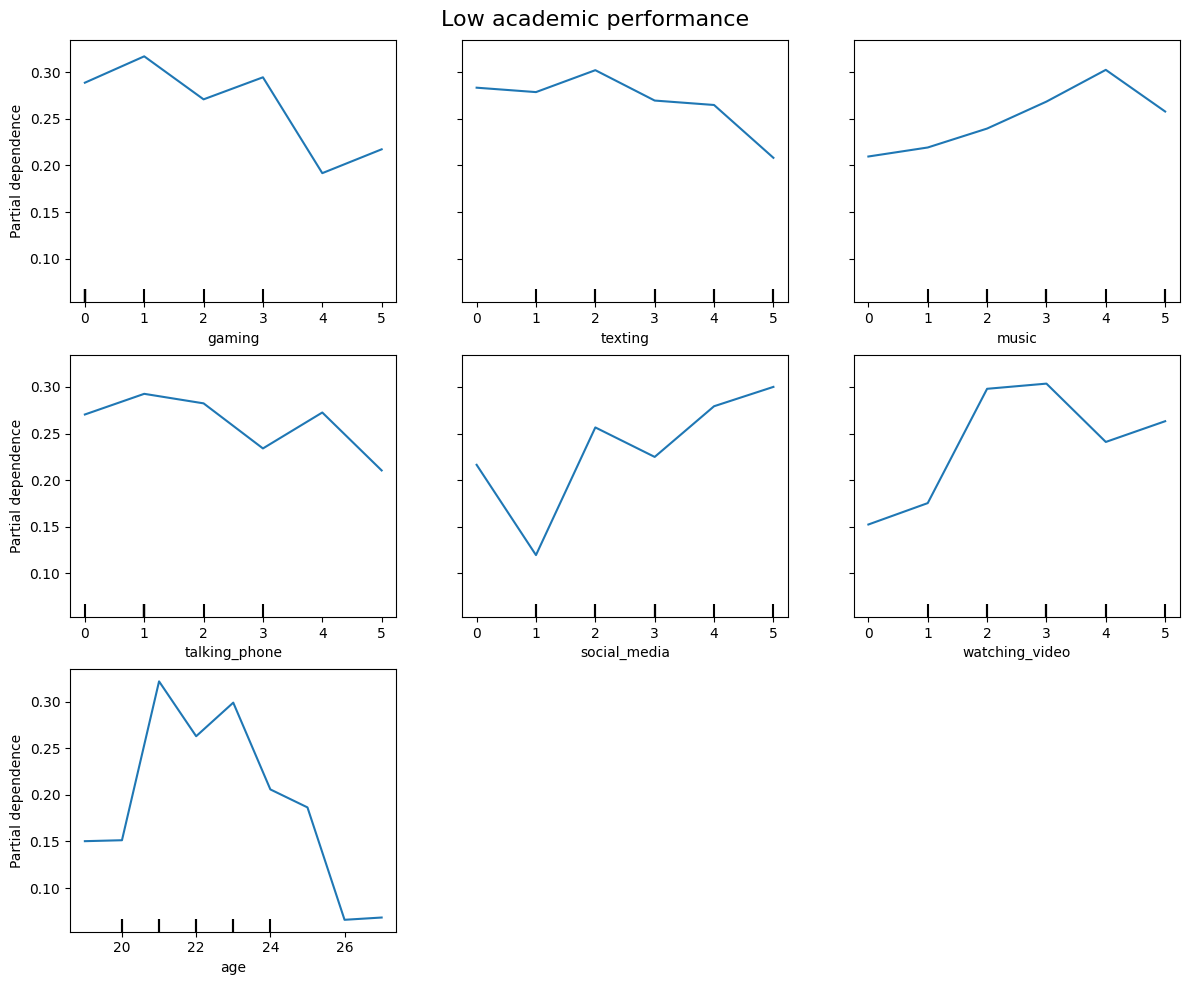

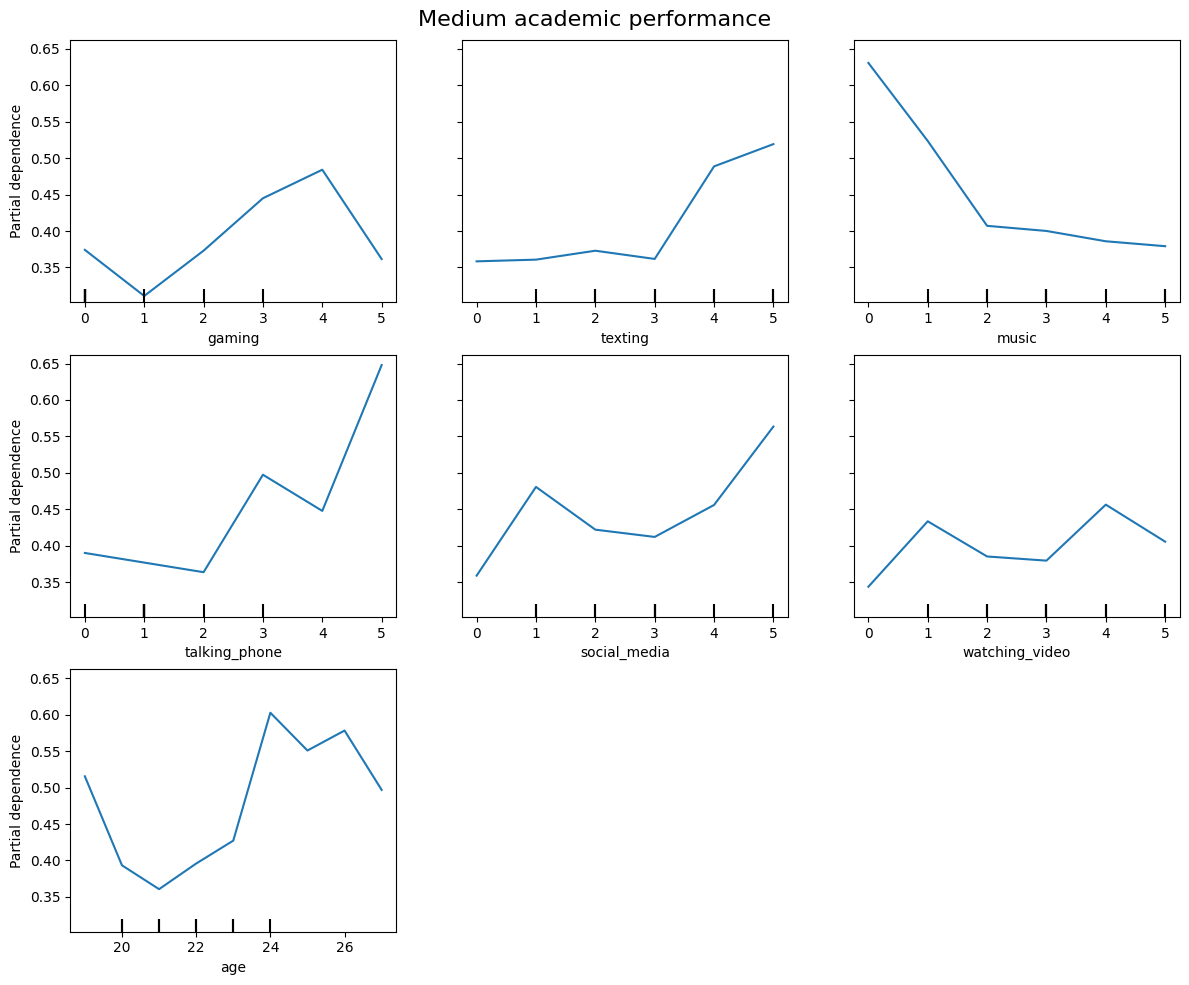

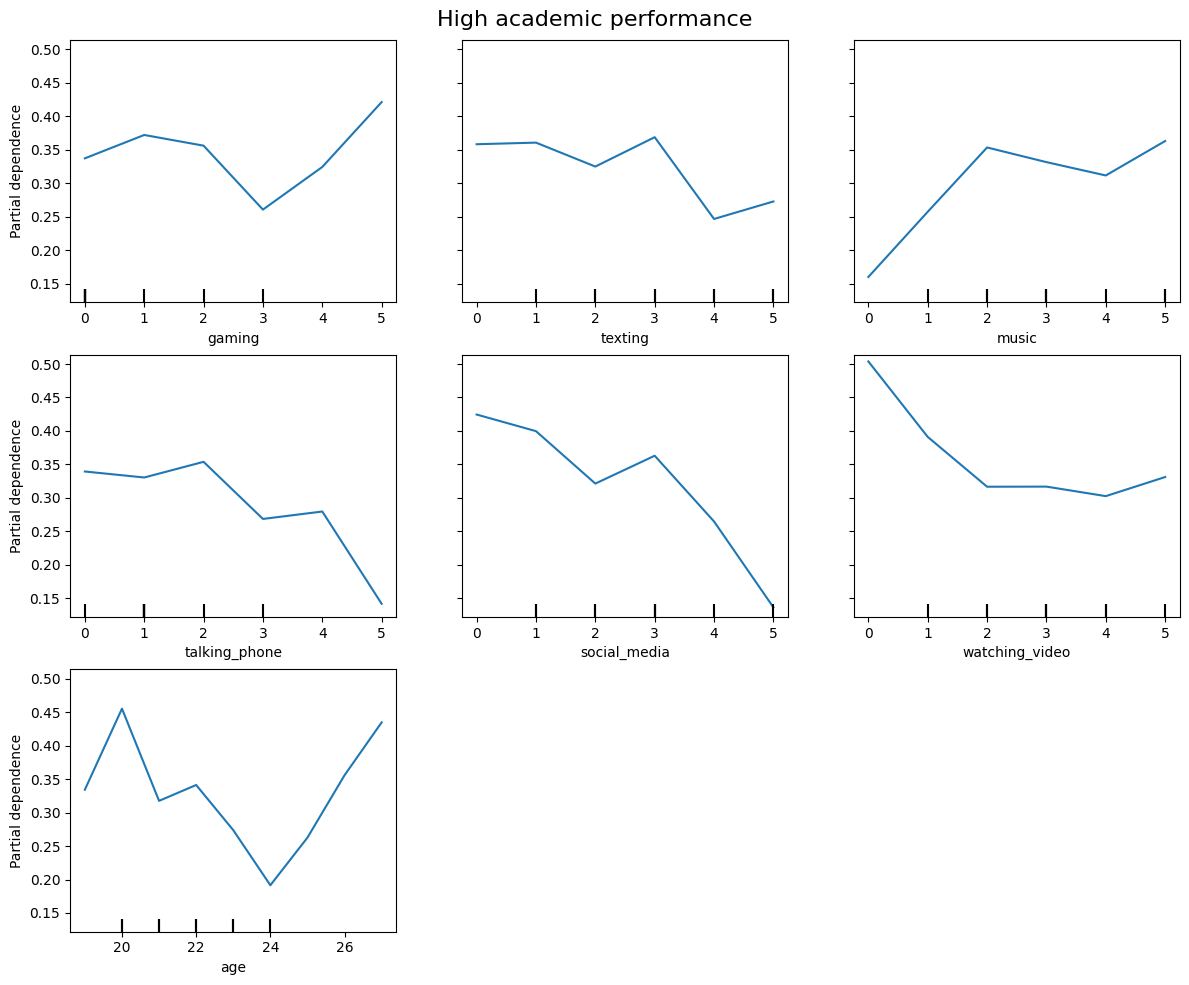

In [138]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

variables=['gaming', 'texting', 'music', 'talking_phone', 'social_media', 'watching_video', 'age']


fig, ax = plt.subplots(figsize=(12, 10))
PartialDependenceDisplay.from_estimator(search, X, features=variables, target=0, ax=ax)

fig.suptitle("Low academic performance", fontsize=16)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(12, 10))
PartialDependenceDisplay.from_estimator(search, X, features=variables, target=1, ax=ax)

fig.suptitle("Medium academic performance", fontsize=16)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(12, 10))
PartialDependenceDisplay.from_estimator(search, X, features=variables, target=2, ax=ax)

fig.suptitle("High academic performance", fontsize=16)
plt.tight_layout()
plt.show()